<a href="https://colab.research.google.com/github/adv555/DataScience/blob/main/SciPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from scipy import constants
from scipy.interpolate import interp1d
from scipy import integrate
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt


# Task 1 (mix)

In [4]:
speed = [25, 35, 45, 30, 60, 120, 100, 100, 70, 75, 80, 65]
time = np.linspace(0,12,12)
more_time = np.linspace(0,12,10000)
time, more_time

(array([ 0.        ,  1.09090909,  2.18181818,  3.27272727,  4.36363636,
         5.45454545,  6.54545455,  7.63636364,  8.72727273,  9.81818182,
        10.90909091, 12.        ]),
 array([0.00000000e+00, 1.20012001e-03, 2.40024002e-03, ...,
        1.19975998e+01, 1.19987999e+01, 1.20000000e+01]))

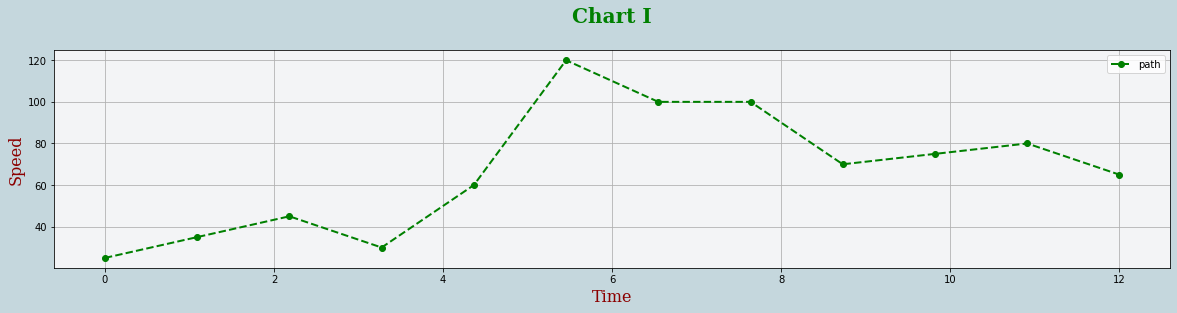

In [5]:
f = plt.figure();
f.set_figwidth(20)
# f.set_figheight(11)
ax = f.add_subplot(111)
f.set(facecolor = '#c5d7dd')
ax.set(facecolor = '#f3f4f6')
f = interp1d(time, speed, kind='cubic')

# display(plt.plot(time, speed, label='mean night temperature',
#     linestyle = "--",
#     color = "g",
#     linewidth = 2,
#     marker ='o',
#     ));


ax.plot(time, speed, label='path',
    linestyle = "--",
    color = "g",
    linewidth = 2,
    marker ='o')


ax.legend()

title = {'family': 'serif',
        'color':  'green',
        'weight': 'bold',
        'size': 20,
         
        }
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.title('Chart I', fontdict=title, x=0.5, y=1.1)
plt.xlabel('Time', fontdict=font)
plt.ylabel('Speed', fontdict=font)
plt.grid()
plt.show();

In [6]:
result = integrate.quad(lambda x: np.sin(x), 0, 11)
print(result)

(0.9955743020119495, 1.0608408129116478e-10)


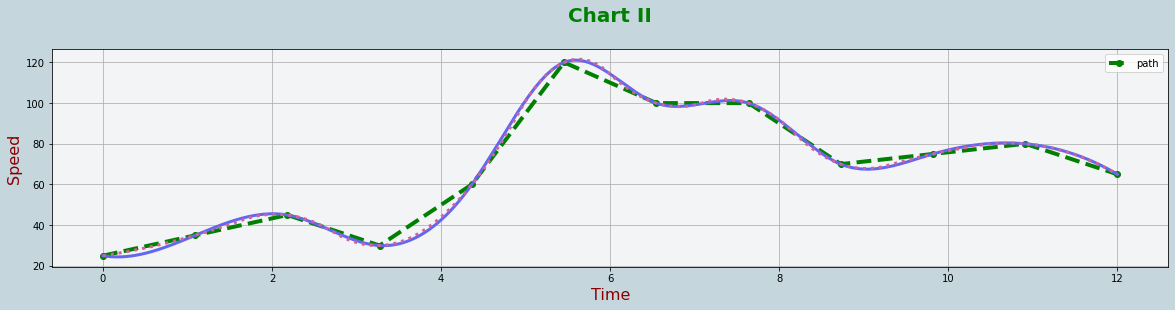

In [10]:
f = plt.figure();
f.set_figwidth(20)
# f.set_figheight(11)
ax = f.add_subplot(111)
f.set(facecolor = '#c5d7dd')
ax.set(facecolor = '#f3f4f6')
f = interp1d(time, speed, kind='cubic')
f1 = interp1d(time,speed,kind='quadratic')


plt.plot(time, speed, label='path',
    linestyle = "--",
    color = "g",
    linewidth = 4,
    marker ='o')

# more_time = np.linspace(0,11,10000)
plt.plot(more_time, f(more_time),color = "#6366f1", linewidth = 3, linestyle = "-" )
plt.plot(more_time, f1(more_time), color = "#ce649a",  linewidth = 3, linestyle = ":")

ax.legend()

title = {'family': 'sans',
        'color':  'green',
        'weight': 'bold',
        'size': 20,
         
        }
font = {'family': 'sans',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.title('Chart II', fontdict=title, x=0.5, y=1.1)
plt.xlabel('Time', fontdict=font)
plt.ylabel('Speed', fontdict=font)
plt.grid()
plt.show();

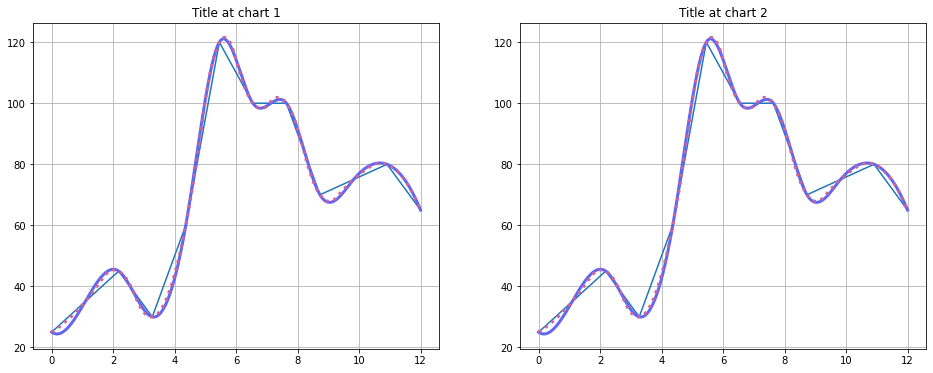

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
locs = ['center', 'center']
titles = ['chart 1', 'chart 2']
# f = interp1d(time, speed, kind='cubic')
# f1 = interp1d(time,speed,kind='quadratic')
# more_time = np.linspace(0,11,10000)

# axs[0].plot(time, speed)
# axs[1].plot(time, speed)
for ax, loc, title in zip(axs, locs, titles):
    ax.plot(time, speed)
    
    ax.plot(more_time, f(more_time),color = "#6366f1", linewidth = 3, linestyle = "-" )
    ax.plot(more_time, f1(more_time), color = "#ce649a",  linewidth = 3, linestyle = ":")

    ax.grid()
    ax.set_title('Title at '+title, loc=loc)
plt.show()

# Task 1 (solution)

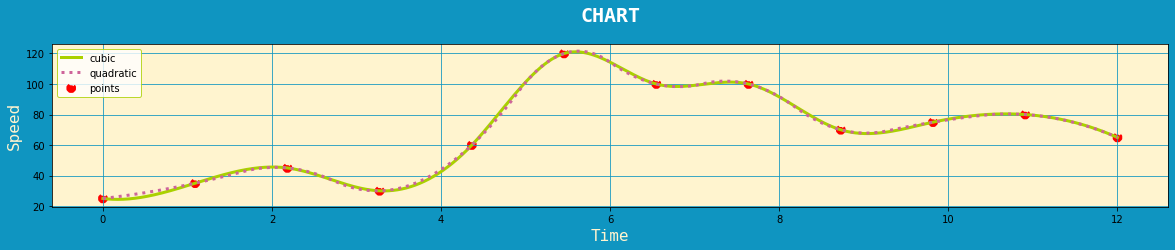

In [9]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)

fig.set(facecolor = '#0f95c1')
fig.set_figwidth(20)
ax.set(facecolor = '#fff4cf')


font={'color':'#fff4cf',"weight":'normal', 'size':16, 'family':'monospace'}

f = interp1d(time, speed, kind='cubic')
f1 = interp1d(time,speed,kind='quadratic')

ax.set_title('CHART', color='white',weight='bold', size=20, family='monospace',  x=0.5, y=1.1)
ax.set_xlabel('Time', fontdict=font)
ax.set_ylabel('Speed', fontdict=font)

ax.scatter(time, speed, label='points',
    linestyle = "--",
    color = "r",
    linewidth = 4,
    marker ='8')


ax.plot(more_time, f(more_time),color = "#aad100", linewidth = 3, linestyle = "-" , label ='cubic' )
ax.plot(more_time, f1(more_time), color = "#ce649a",  linewidth = 3, linestyle = ":", label ='quadratic')

plt.grid(color='#0f95c1')
ax.legend(loc='upper left',  edgecolor = '#aad100')

plt.show()

In [11]:
# result = integrate.quad(lambda x: np.sin(x), 0, 11)
# print(result)

In [12]:
result_1 = integrate.quad(f, 0, 11)
print(result_1)

(756.9176185106543, 8.017374717429806e-06)


In [13]:
result_2 = integrate.quad(f1, 0, 11)
print(result_2)

(758.2404686014429, 1.0263633359410045e-05)


# Task 2

Пусть все население (N индивидов) делится на три группы: индивиды, которые восприимчивы к данной болезни, но здоровы (susceptible) — S(t); зараженные индивиды (infected) — I(t) (они больны сами и являются носителями болезни) и здоровые индивиды, обладающие иммунитетом к данной болезни (recovered) — R(t).\
**`Примем, что`** \

> **S(t)+I(t)+R(t)=N** \

**Числа восприимчивых к болезни индивидов будет пропорционально числу самих восприимчивых индивидов:**

> **dt/dS = −αS**

**Cкорость изменения инфицированных индивидов:** \

> **dt/dI = αS−βI**

**Скорость изменения числа выздоравливающих индивидов:** \

> **dt/dR = βI**

Постоянные пропорциональности **α** и **β** называют коэффициентами заболеваемости и выздоровления соответственно. \
**`Примем, что:`**

1. α = 0.5
2. β = 0.3
3. N = 1 000 000
4. S(0) = 990 000
5. I(0) = 7 000
6. R(0) = 3 000
7. t_0, t_f = 0, 25

**`Необходимо выполнить:`** \
1. Решить дифференциальное уравнение (2) и построить график функции S(t)
2. Решить дифференциальное уравнение (3) и построить график функции I(t)
3. Используя решения уравнений (2) и (3), с помощью уравнения (1), найти решение уравнения (4) (используйте интерполяцию interpid) и построить график функции R(t)
4. Построить все три графика S(t), I(t) и R(t) на одной области отображения

In [14]:
alpha = 0.5
beta = 0.3
N = 1000000
S = 990000
I = 7000
R = 3000
t0, tf = 0, 25

t = np.linspace(t0, tf, 100)

In [15]:
def dydt(t, s):
    return -alpha*s

soln = solve_ivp(dydt, (t0, tf), [S])
print(soln)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 98
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.11486984,  1.26356819,  3.06043758,  4.8157449 ,
        6.57363058,  8.33135596, 10.08909132, 11.84682607, 13.60456089,
       15.36229578, 17.12003086, 18.87776637, 20.63550293, 22.39324202,
       24.15098721, 25.        ])
 t_events: None
        y: array([[9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
        8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
        2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
        7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
        3.71298656e+00]])
 y_events: None


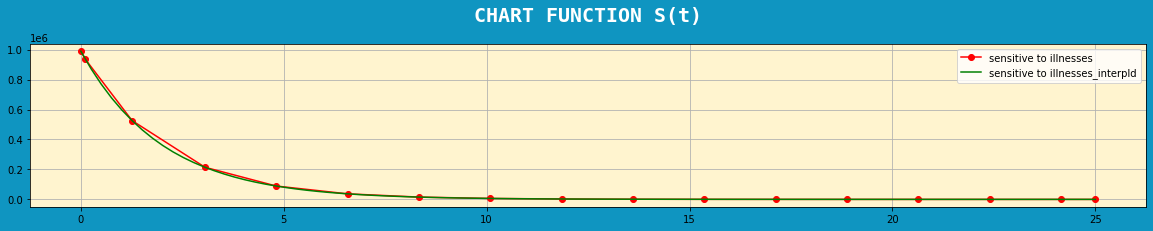

In [38]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)

fig.set(facecolor = '#0f95c1')
fig.set_figwidth(20)
ax.set(facecolor = '#fff4cf')
ax.set_title('CHART FUNCTION S(t)', color='white',weight='bold', size=20, family='monospace',  x=0.5, y=1.1)

t1, y1 = soln.t, soln.y[0]
plt.plot(t1, y1, 'o', color='r', label='sensitive to illnesses', linestyle = "-")
fs = interp1d(t1, y1, kind='cubic')
plt.plot(t, fs(t), color='g', label='sensitive to illnesses_interpld', linestyle = "-")

plt.grid()
plt.legend()
plt.show();

In [49]:
def dydt(t, i):
    # return alpha*S - beta*I
    return alpha*fs(t) - beta*i

soln2 = solve_ivp(dydt, (t0, tf), [I])
print(soln2)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 80
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.42016636e-02, 1.56218300e-01, 1.48682831e+00,
       3.32654127e+00, 5.50893895e+00, 8.36009723e+00, 1.14769130e+01,
       1.45937289e+01, 1.76665712e+01, 2.06610836e+01, 2.36247769e+01,
       2.50000000e+01])
 t_events: None
        y: array([[  7000.        ,  13960.25999029,  79326.559535  ,
        411976.21689438, 445617.72941214, 317778.84605421,
        164224.0671551 ,  71399.86756976,  29501.10137517,
         12049.59474008,   4976.15916345,   2061.26024391,
          1367.39293921]])
 y_events: None


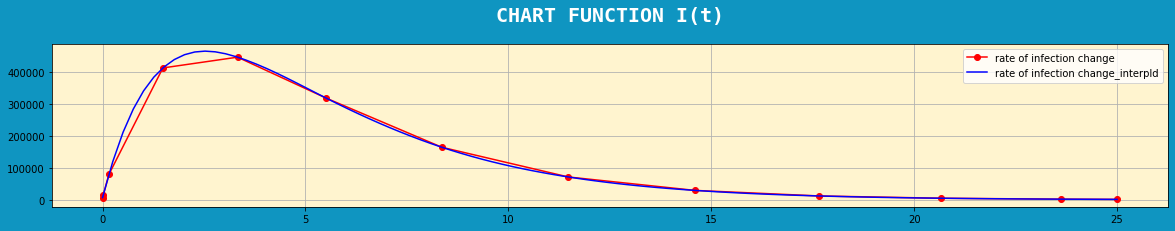

In [50]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)

fig.set(facecolor = '#0f95c1')
fig.set_figwidth(20)
ax.set(facecolor = '#fff4cf')
ax.set_title('CHART FUNCTION I(t)', color='white',weight='bold', size=20, family='monospace',  x=0.5, y=1.1)

t2, y2 = soln2.t, soln2.y[0]
plt.plot(t2, y2, 'o', color='r', label='rate of infection change', linestyle = "-")
fi = interp1d(t2, y2, kind='cubic')
plt.plot(t, fi(t),  color='b', label='rate of infection change_interpld', linestyle = "-")

plt.grid()
plt.legend()
plt.show();

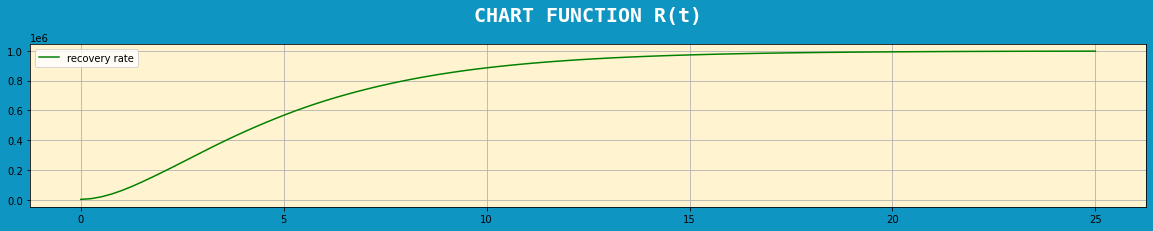

In [51]:
# S(t)+I(t)+R(t) = N
# R(t) = N-S(t)-I(t)
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)

fig.set(facecolor = '#0f95c1')
fig.set_figwidth(20)
ax.set(facecolor = '#fff4cf')
ax.set_title('CHART FUNCTION R(t)', color='white',weight='bold', size=20, family='monospace',  x=0.5, y=1.1)

r = N-fs(t)-fi(t)
# print(r)
plt.plot(t,r, color='g', label='recovery rate', linestyle = "-")

plt.grid()
plt.legend()
plt.show();

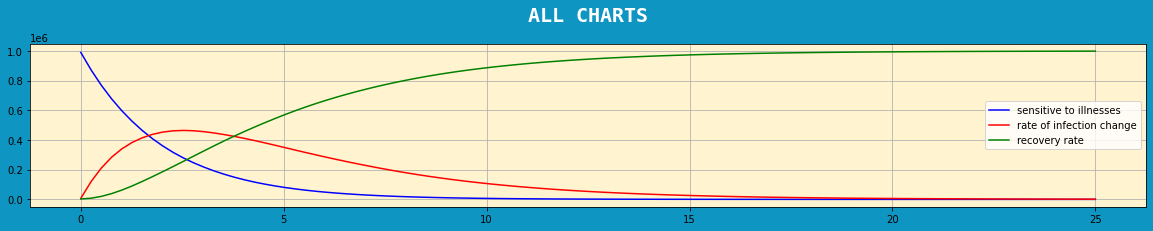

In [52]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)

fig.set(facecolor = '#0f95c1')
fig.set_figwidth(20)
ax.set(facecolor = '#fff4cf')
ax.set_title('ALL CHARTS', color='white',weight='bold', size=20, family='monospace',  x=0.5, y=1.1)

plt.plot(t, fs(t), color='b', label='sensitive to illnesses', linestyle = "-")
plt.plot(t, fi(t), color='r', label='rate of infection change', linestyle = "-")
plt.plot(t,r, color='g', label='recovery rate', linestyle = "-")
# plt.plot(t, fs(t), t, fi(t), t, r)

plt.grid()
plt.legend()
plt.show()